My fist project

In [1]:
import pandas as pd
from sklearn import tree
from sklearn.preprocessing import LabelEncoder


def data_preparing(data):
    y = []
    x = data
    
    if 'Survived' in data:
        y = data['Survived']
        x = data.drop(columns=['Survived'])
        
    lbEncoder = LabelEncoder()

    lbEncoder.fit(x.Sex)
    x['Sex'] = lbEncoder.transform(x.Sex)


    lbEncoder.fit(x.Name)
    x['Name'] = lbEncoder.transform(x.Name)

    lbEncoder.fit(x.Ticket)
    x['Ticket'] = lbEncoder.transform(x.Ticket)
    
    x['Age'] = x['Age'].fillna(x['Age'].mean())
    
    x = x.drop('Cabin',1)
    
    #Embarked
    maxEmbarked = x.groupby('Embarked').count()['PassengerId']
    tmp = maxEmbarked[maxEmbarked == maxEmbarked.max()].index[0]
    x.fillna(tmp)


    x['Embarked'] = x['Embarked'].astype('str')


    lbEncoder.fit(x.Embarked)
    x['Embarked'] = lbEncoder.transform(x.Embarked)
    
    #??
    tmp = x.Fare.median()
    x['Fare'].fillna(tmp)
    
    return x,y

In [2]:

data_train = pd.read_csv("./kaggle/input/titanic/train.csv")

x_train, y_train = data_preparing(data_train)

x_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,3,108,1,22.0,1,0,523,7.2500,2
1,2,1,190,0,38.0,1,0,596,71.2833,0
2,3,3,353,0,26.0,0,0,669,7.9250,2
3,4,1,272,0,35.0,1,0,49,53.1000,2
4,5,3,15,1,35.0,0,0,472,8.0500,2


In [3]:
data_test = pd.read_csv("./kaggle/input/titanic/test.csv")
x_test, y_test = data_preparing(data_test)
x_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,206,1,34.5,0,0,152,7.8292,1
1,893,3,403,0,47.0,1,0,221,7.0000,2
2,894,2,269,1,62.0,0,0,73,9.6875,1
3,895,3,408,1,27.0,0,0,147,8.6625,2
4,896,3,178,0,22.0,1,1,138,12.2875,2


Train models

In [4]:
from sklearn import model_selection, svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from pandas import read_csv, DataFrame, Series
import pylab as pl

In [5]:
kfold = 5 #cout of cross_validation
itog_val = {}

In [6]:
model_rfc = RandomForestClassifier(n_estimators = 70) #в параметре передаем кол-во деревьев
model_knc = KNeighborsClassifier(n_neighbors = 18) #в параметре передаем кол-во соседей
model_lr = LogisticRegression(penalty='l1',solver='liblinear') 
model_svc = svm.SVC() #по умолчанию kernek='rbf'

Tesy models

In [7]:
scores = model_selection.cross_val_score(model_rfc, x_train, y_train, cv = kfold)
itog_val['RandomForestClcross_validationassifier'] = scores.mean()

scores = model_selection.cross_val_score(model_knc, x_train, y_train, cv = kfold)
itog_val['KNeighborsClassifier'] = scores.mean()

scores = model_selection.cross_val_score(model_lr, x_train, y_train, cv = kfold)
itog_val['LogisticRegression'] = scores.mean()

scores = model_selection.cross_val_score(model_svc, x_train, y_train, cv = kfold)
itog_val['SVC'] = scores.mean()

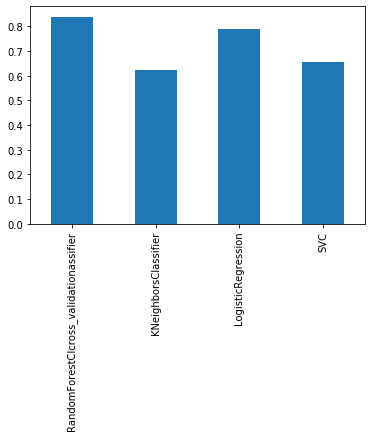

In [8]:
DataFrame.from_dict(data = itog_val, orient='index').plot(kind='bar', legend=False)